In [ ]:
import os

import pandas as pd
import numpy as np
import polars as pl

from great_tables import GT

import seaborn as sns
import matplotlib.pyplot as plt



# Import display from IPython to allow display of plots in notebook
from IPython.display import display

In [1]:
data = pd.read_csv("example_data/Cancer_Data.csv")
data.drop(columns="Unnamed: 32", inplace=True)
data.columns = data.columns.str.replace(" ", "_")

NameError: name 'pd' is not defined

In [4]:
summary = data.groupby("diagnosis").mean().reset_index()

(
    GT(summary)
    .tab_header(title = "SUMMARY")
    .tab_stub(rowname_col = "diagnosis")
    .tab_stubhead(label = "Diagnosis")
    .fmt_number(decimals = 2)
)

GT(_tbl_data=  diagnosis            id  radius_mean  ...  concave_points_worst  symmetry_worst  fractal_dimension_worst
0         B  2.654382e+07    12.146524  ...              0.074444        0.270246                 0.079442
1         M  3.681805e+07    17.462830  ...              0.182237        0.323468                 0.091530

[2 rows x 32 columns], _body=<great_tables._gt_data.Body object at 0x0000024DDB2D4E80>, _boxhead=Boxhead([ColInfo(var='diagnosis', type=<ColInfoTypeEnum.stub: 2>, column_label='diagnosis', column_align='left', column_width=None), ColInfo(var='id', type=<ColInfoTypeEnum.default: 1>, column_label='id', column_align='right', column_width=None), ColInfo(var='radius_mean', type=<ColInfoTypeEnum.default: 1>, column_label='radius_mean', column_align='right', column_width=None), ColInfo(var='texture_mean', type=<ColInfoTypeEnum.default: 1>, column_label='texture_mean', column_align='right', column_width=None), ColInfo(var='perimeter_mean', type=<ColInfoTypeEnum.default: 1>, column_label='perimeter_mean', column_align='right', column_width=None), ColInfo(var='area_mean', type=<ColInfoTypeEnum.default: 1>, column_label='area_mean', column_align='right', column_width=None), ColInfo(var='smoothness_mean', type=<ColInfoTypeEnum.default: 1>, column_label='smoothness_mean', column_align='right', column_width=None), ColInfo(var='compactness_mean', type=<ColInfoTypeEnum.default: 1>, column_label='compactness_mean', column_align='right', column_width=None), ColInfo(var='concavity_mean', type=<ColInfoTypeEnum.default: 1>, column_label='concavity_mean', column_align='right', column_width=None), ColInfo(var='concave_points_mean', type=<ColInfoTypeEnum.default: 1>, column_label='concave_points_mean', column_align='right', column_width=None), ColInfo(var='symmetry_mean', type=<ColInfoTypeEnum.default: 1>, column_label='symmetry_mean', column_align='right', column_width=None), ColInfo(var='fractal_dimension_mean', type=<ColInfoTypeEnum.default: 1>, column_label='fractal_dimension_mean', column_align='right', column_width=None), ColInfo(var='radius_se', type=<ColInfoTypeEnum.default: 1>, column_label='radius_se', column_align='right', column_width=None), ColInfo(var='texture_se', type=<ColInfoTypeEnum.default: 1>, column_label='texture_se', column_align='right', column_width=None), ColInfo(var='perimeter_se', type=<ColInfoTypeEnum.default: 1>, column_label='perimeter_se', column_align='right', column_width=None), ColInfo(var='area_se', type=<ColInfoTypeEnum.default: 1>, column_label='area_se', column_align='right', column_width=None), ColInfo(var='smoothness_se', type=<ColInfoTypeEnum.default: 1>, column_label='smoothness_se', column_align='right', column_width=None), ColInfo(var='compactness_se', type=<ColInfoTypeEnum.default: 1>, column_label='compactness_se', column_align='right', column_width=None), ColInfo(var='concavity_se', type=<ColInfoTypeEnum.default: 1>, column_label='concavity_se', column_align='right', column_width=None), ColInfo(var='concave_points_se', type=<ColInfoTypeEnum.default: 1>, column_label='concave_points_se', column_align='right', column_width=None), ColInfo(var='symmetry_se', type=<ColInfoTypeEnum.default: 1>, column_label='symmetry_se', column_align='right', column_width=None), ColInfo(var='fractal_dimension_se', type=<ColInfoTypeEnum.default: 1>, column_label='fractal_dimension_se', column_align='right', column_width=None), ColInfo(var='radius_worst', type=<ColInfoTypeEnum.default: 1>, column_label='radius_worst', column_align='right', column_width=None), ColInfo(var='texture_worst', type=<ColInfoTypeEnum.default: 1>, column_label='texture_worst', column_align='right', column_width=None), ColInfo(var='perimeter_worst', type=<ColInfoTypeEnum.default: 1>, column_label='perimeter_worst', column_align='right', column_width=None), ColInfo(var='area_worst', type=<ColInfoTypeEnum.default: 1>, column_label='area_worst', column_align='right', column_width=None), ColInfo(var='smoothness_worst', type=<Col

In [40]:
   
## ORRRRR

df = data[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']]

df["size"] = pd.qcut(df["radius_mean"], q=3, labels = ["Small", 'Medium', 'Large'])

summary = df.groupby(['diagnosis', 'size']).agg(
    count = ("radius_mean", "count"),
    mean_radius_mean=("radius_mean", "mean"),  # Mean of the 'area' column
    mean_texture_mean=("texture_mean", "mean") , # Mean of the 'area' column,
    texture_mean = ("texture_mean", lambda x: " ".join(map(str, x))),  
)

summary = summary.reset_index()


summary


<positron-console-cell-40>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<positron-console-cell-40>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


,diagnosis,size,count,mean_radius_mean,mean_texture_mean,texture_mean
0,B,Small,185,10.787022,17.980000,12.44 16.84 14.63 21.6 18.24 18.75 11.79 14.88...
1,B,Medium,149,13.320604,18.057450,14.36 15.71 18.42 22.3 16.34 19.31 16.49 16.52...
2,B,Large,23,15.475652,16.465652,16.39 13.93 18.77 19.46 19.76 16.95 12.91 15.5...
3,M,Small,6,11.475000,18.996667,20.38 18.7 21.35 16.58 18.14 18.83
4,M,Medium,39,13.700256,21.482821,15.7 20.83 21.82 24.04 22.61 27.54 20.13 21.53...
5,M,Large,167,18.556647,21.727126,10.38 17.77 21.25 14.34 19.98 23.24 17.89 24.8...


In [41]:
(
    GT(summary)
    .tab_header(title = "SUMMARY")
    .tab_stub(rowname_col = "diagnosis", groupname_col = "size")
    .fmt_number(columns = ['mean_radius_mean', 'mean_texture_mean'], decimals = 2)
    .fmt_nanoplot(columns = "texture_mean")
)

C:\Users\vaithid1\AppData\Local\anaconda3\envs\python-intro-env\lib\site-packages\great_tables\_tbl_data.py:261: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g_df = data.groupby(group_key, dropna=False)


GT(_tbl_data=  diagnosis    size  count  mean_radius_mean  mean_texture_mean                                       texture_mean
0         B   Small    185         10.787022          17.980000  12.44 16.84 14.63 21.6 18.24 18.75 11.79 14.88...
1         B  Medium    149         13.320604          18.057450  14.36 15.71 18.42 22.3 16.34 19.31 16.49 16.52...
2         B   Large     23         15.475652          16.465652  16.39 13.93 18.77 19.46 19.76 16.95 12.91 15.5...
3         M   Small      6         11.475000          18.996667                 20.38 18.7 21.35 16.58 18.14 18.83
4         M  Medium     39         13.700256          21.482821  15.7 20.83 21.82 24.04 22.61 27.54 20.13 21.53...
5         M   Large    167         18.556647          21.727126  10.38 17.77 21.25 14.34 19.98 23.24 17.89 24.8..., _body=<great_tables._gt_data.Body object at 0x0000024DEBBE73A0>, _boxhead=Boxhead([ColInfo(var='diagnosis', type=<ColInfoTypeEnum.stub: 2>, column_label='diagnosis', column_align='left', column_width=None), ColInfo(var='size', type=<ColInfoTypeEnum.row_group: 3>, column_label='size', column_align='center', column_width=None), ColInfo(var='count', type=<ColInfoTypeEnum.default: 1>, column_label='count', column_align='right', column_width=None), ColInfo(var='mean_radius_mean', type=<ColInfoTypeEnum.default: 1>, column_label='mean_radius_mean', column_align='right', column_width=None), ColInfo(var='mean_texture_mean', type=<ColInfoTypeEnum.default: 1>, column_label='mean_texture_mean', column_align='right', column_width=None), ColInfo(var='texture_mean', type=<ColInfoTypeEnum.default: 1>, column_label='texture_mean', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x0000024DEBC472B0>, _spanners=Spanners([]), _heading=Heading(title='SUMMARY', subtitle=None, preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x0000024DEBC46EC0>, _formats=[<great_tables._gt_data.FormatInfo object at 0x0000024DEBAC52D0>, <great_tables._gt_data.FormatInfo object at 0x0000024DEB912350>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_

In [46]:
summary["count"] = summary["count"].astype("float64")

In [47]:
summary.dtypes

diagnosis              object
size                 category
count                 float64
mean_radius_mean      float64
mean_texture_mean     float64
texture_mean           object
dtype: object

In [50]:
(
    GT(summary)
    .tab_header(title = "SUMMARY")
    .tab_stub(rowname_col = "diagnosis", groupname_col = "size")
    .fmt_number(columns = ['mean_radius_mean', 'mean_texture_mean'], decimals = 2)
    .fmt_nanoplot(columns = "texture_mean", reference_area = ["q1", "q3"], autoscale=True)
    .fmt_nanoplot(columns = "count", autoscale = True, plot_type = "bar")
    .opt_stylize(style = 2, color = "blue")
)

C:\Users\vaithid1\AppData\Local\anaconda3\envs\python-intro-env\lib\site-packages\great_tables\_tbl_data.py:261: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g_df = data.groupby(group_key, dropna=False)


GT(_tbl_data=  diagnosis    size  count  mean_radius_mean  mean_texture_mean                                       texture_mean
0         B   Small  185.0         10.787022          17.980000  12.44 16.84 14.63 21.6 18.24 18.75 11.79 14.88...
1         B  Medium  149.0         13.320604          18.057450  14.36 15.71 18.42 22.3 16.34 19.31 16.49 16.52...
2         B   Large   23.0         15.475652          16.465652  16.39 13.93 18.77 19.46 19.76 16.95 12.91 15.5...
3         M   Small    6.0         11.475000          18.996667                 20.38 18.7 21.35 16.58 18.14 18.83
4         M  Medium   39.0         13.700256          21.482821  15.7 20.83 21.82 24.04 22.61 27.54 20.13 21.53...
5         M   Large  167.0         18.556647          21.727126  10.38 17.77 21.25 14.34 19.98 23.24 17.89 24.8..., _body=<great_tables._gt_data.Body object at 0x0000024DED05D330>, _boxhead=Boxhead([ColInfo(var='diagnosis', type=<ColInfoTypeEnum.stub: 2>, column_label='diagnosis', column_align='left', column_width=None), ColInfo(var='size', type=<ColInfoTypeEnum.row_group: 3>, column_label='size', column_align='center', column_width=None), ColInfo(var='count', type=<ColInfoTypeEnum.default: 1>, column_label='count', column_align='right', column_width=None), ColInfo(var='mean_radius_mean', type=<ColInfoTypeEnum.default: 1>, column_label='mean_radius_mean', column_align='right', column_width=None), ColInfo(var='mean_texture_mean', type=<ColInfoTypeEnum.default: 1>, column_label='mean_texture_mean', column_align='right', column_width=None), ColInfo(var='texture_mean', type=<ColInfoTypeEnum.default: 1>, column_label='texture_mean', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x0000024DED05EFB0>, _spanners=Spanners([]), _heading=Heading(title='SUMMARY', subtitle=None, preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x0000024DED05D450>, _formats=[<great_tables._gt_data.FormatInfo object at 0x0000024DEC8777F0>, <great_tables._gt_data.FormatInfo object at 0x0000024DED05E9B0>, <great_tables._gt_data.FormatInfo object at 0x0000024DED05E050>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='3px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#D5D5D5'), table_border_right_style=OptionsInfo

In [51]:
import seaborn.objects as so

# Load the penguins dataset
penguins = sns.load_dataset("penguins")



In [89]:
p = (
    so.Plot(data, x="diagnosis", color = "diagnosis")
    .add(so.Bar(), so.Hist())
)

In [90]:
p = (
    p.label(
        title = "Diagnosis",
        x = "Diagnosis",
        y = "Count"
    )
)

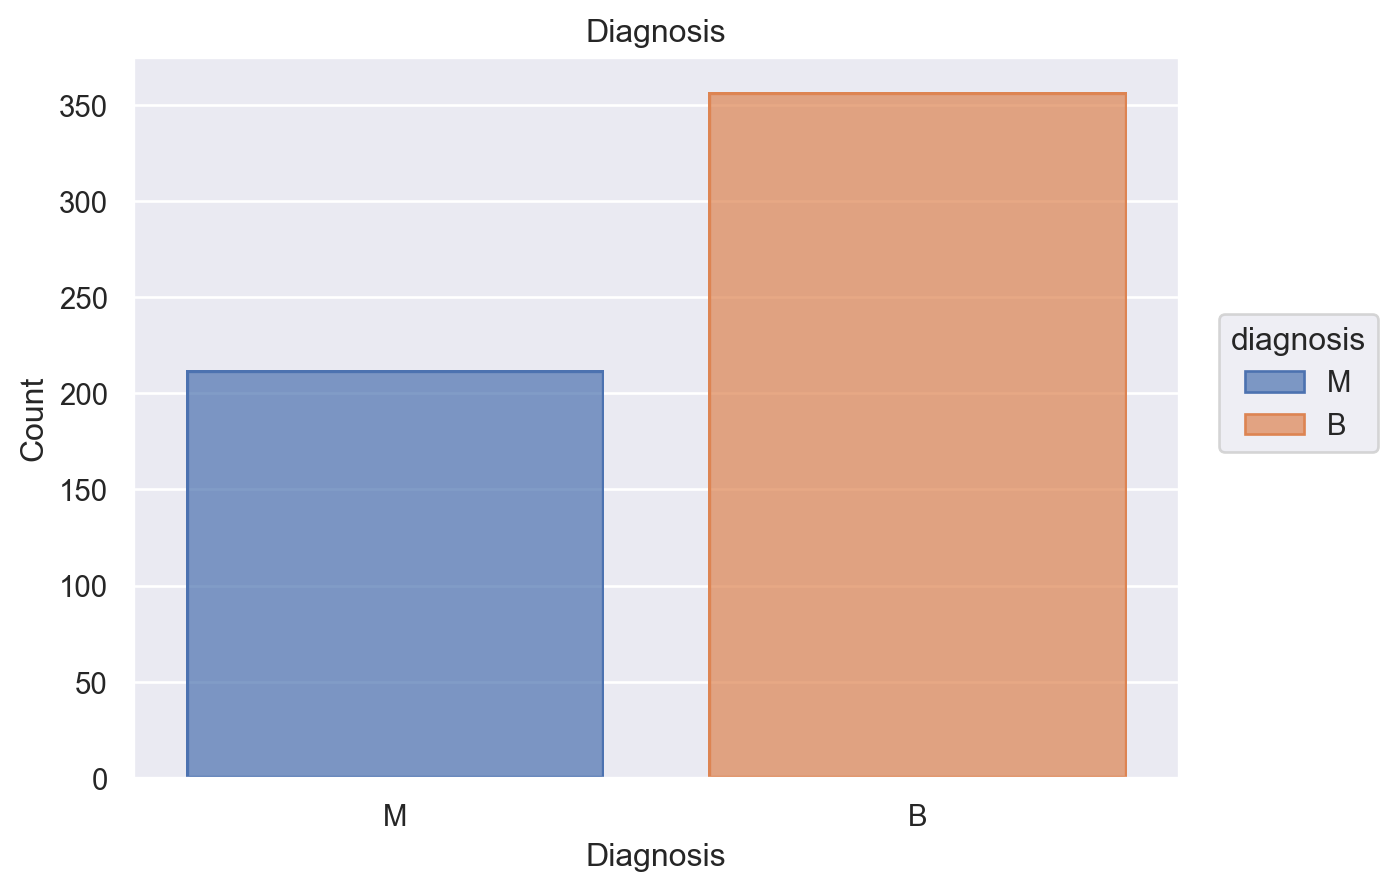

In [91]:
p

In [92]:
p = (
    so.Plot(data, x="diagnosis", color = "diagnosis")
    .add(so.Bar(), so.Hist(stat = "percent"))
    .label(
        title = "Diagnosis",
        x = "Diagnosis",
        y = "Percent"
    )
)

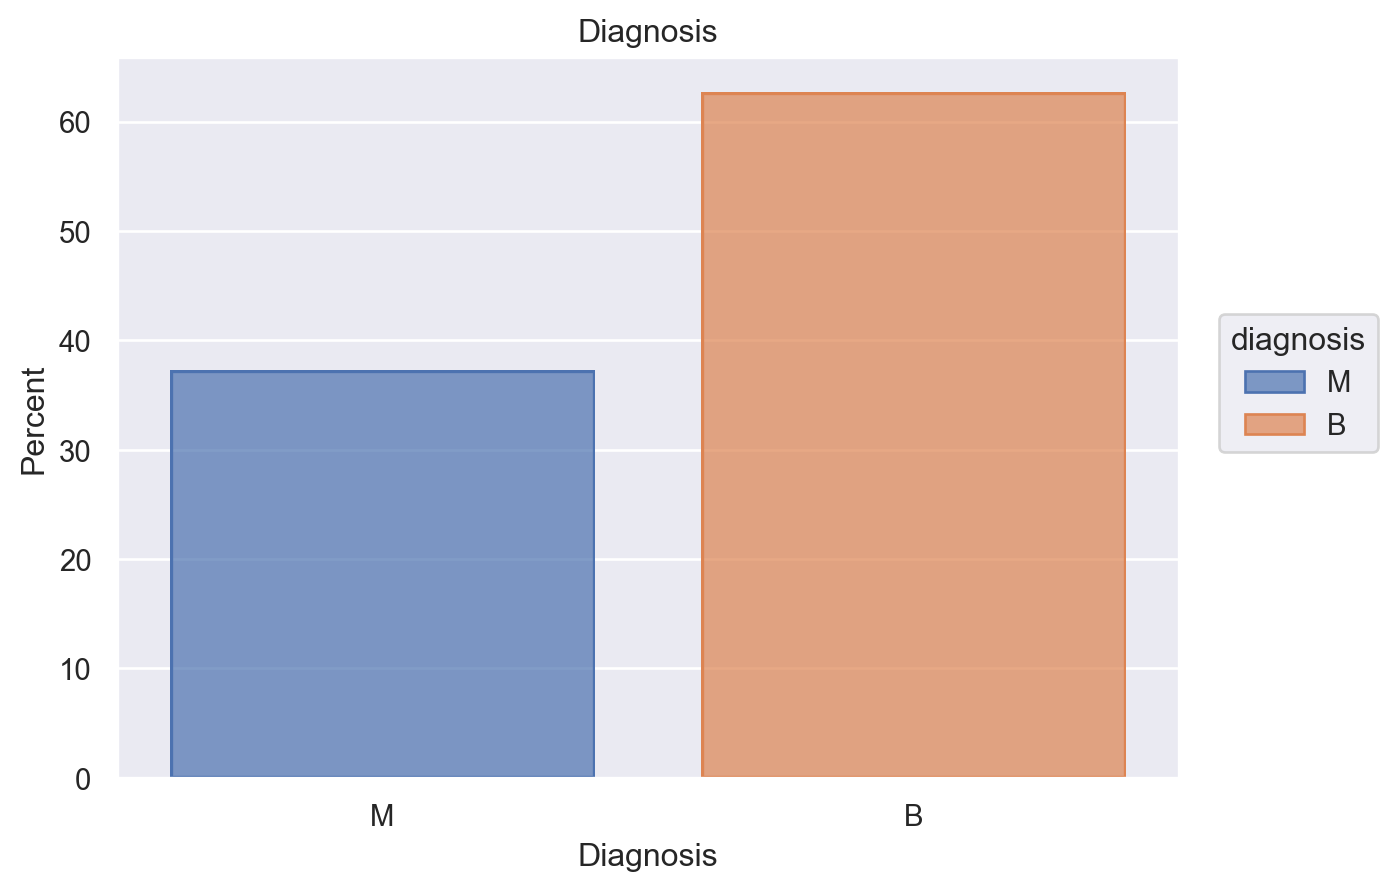

In [93]:
p

In [100]:
color_hex = sns.color_palette("flare").as_hex()

print("The hexcodes for the 'colorblind' palette are:\n", color_hex)

## if we want to make the columns green for benign and yellow for malignant

## the "-" lets us index from the end of the list rather than the front.However, the '-1'th position is the last position (there is no '-0')

colors = {0: color_hex[2], 1: color_hex[-2]}

The hexcodes for the 'colorblind' palette are:
 ['#e98d6b', '#e3685c', '#d14a61', '#b13c6c', '#8f3371', '#6c2b6d']


In [ ]:
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_bar
p = (
    ggplot(data, aes(x = "diagnosis", color = "diagnosis"))
    + geom_bar()
)

p